In [1]:
library(readr)

In [3]:
data2 <- read.csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/nutrition_subset.csv")

In [4]:
# Convert to data frame and summarize 
summary(data2)

                                  food.item   weight_in_grams 
 100% NATURAL CEREAL           1 OZ    :  1   Min.   :   0.4  
 1000 ISLAND; SALAD DRSNG;LOCAL1 TBSP  :  1   1st Qu.:  32.0  
 1000 ISLAND; SALAD DRSNG;REGLR1 TBSP  :  1   Median : 113.0  
 40% BRAN FLAKES; KELLOGG'S    1 OZ    :  1   Mean   : 149.4  
 40% BRAN FLAKES; POST         1 OZ    :  1   3rd Qu.: 218.0  
 ALFALFA SEEDS; SPROUTED; RAW  1 CUP   :  1   Max.   :1542.0  
 (Other)                               :955                   
 saturated_fat      cholesterol     
 Min.   :  0.000   Min.   :   0.00  
 1st Qu.:  0.000   1st Qu.:   0.00  
 Median :  0.400   Median :   0.00  
 Mean   :  3.988   Mean   :  32.55  
 3rd Qu.:  3.300   3rd Qu.:  20.00  
 Max.   :119.900   Max.   :2053.00  
                                    

In [5]:
# Column names
# names(bank_data)
colnames(data2)

[1] "food.item"       "weight_in_grams" "saturated_fat"   "cholesterol"

In [8]:
#Sort the data set by saturated_ fat and produce a listing of the five food items highest in saturated fat. 
#Comment on the validity of comparing food items of different sizes.
## Create a data frame 
satFat <- data.frame(
    data2[data2$saturated_fat , ] 
)

# Print the data frame	
print(satFat)

                                  food.item weight_in_grams saturated_fat
5    PARMESAN CHEESE; GRATED       1 CUP             100.00          19.1
19   PORK; CURED; BACON; REGUL;CKED3 SLICE            19.00           3.3
1    GELATIN; DRY                  1 ENVELP            7.00           0.0
2    SEAWEED; SPIRULINA; DRIED     1 OZ               28.35           0.8
4    PARMESAN CHEESE; GRATED       1 OZ               28.35           5.4
1.1  GELATIN; DRY                  1 ENVELP            7.00           0.0
2.1  SEAWEED; SPIRULINA; DRIED     1 OZ               28.35           0.8
2.2  SEAWEED; SPIRULINA; DRIED     1 OZ               28.35           0.8
2.3  SEAWEED; SPIRULINA; DRIED     1 OZ               28.35           0.8
6    PARMESAN CHEESE; GRATED       1 TBSP              5.00           1.0
2.4  SEAWEED; SPIRULINA; DRIED     1 OZ               28.35           0.8
3    YEAST; BAKERS; DRY; ACTIVE    1 PKG               7.00           0.0
1.2  GELATIN; DRY                  1 E

In [26]:
#here I tried to show the top 5 values in the satirated fat category
data2 <- data2[with(data2,order(-saturated_fat)),]

data2 <- data2[1:5,]
print(data2)
#https://stackoverflow.com/questions/31939643/make-a-table-showing-the-10-largest-values-of-a-variable-in-r

                                 food.item weight_in_grams saturated_fat
411 DEVIL'S FOOD CAKE;CHOCFRST;FMX1 CAKE              1107          10.0
710 BUTTER; SALTED                1/2 CUP              113           8.5
711 BUTTER; UNSALTED              1/2 CUP              113           8.5
423 CARROT CAKE;CREMCHESE FRST;REC1 CAKE              1536           7.0
467 ICE CREAM; VANLLA; REGULR 11% 1/2 GALN            1064           6.0
    cholesterol
411         598
710         247
711         247
423        1183
467         476


In [27]:
#Create a new variable, saturated_fat_per_gram, by dividing the amount of saturated fat  by the weight in grams
data2$saturated_fat_per_gram <- data2$saturated_fat /  data2$weight_in_grams

In [28]:
max(data2$saturated_fat_per_gram)

[1] 0.07522124

In [33]:
#here I tried to show the top 5 values in the satirated fat per gram category
data2 <- data2[with(data2,order(-saturated_fat_per_gram)),]

data2 <- data2[1:5,]
print(data2)

                                 food.item weight_in_grams saturated_fat
710 BUTTER; SALTED                1/2 CUP              113           8.5
711 BUTTER; UNSALTED              1/2 CUP              113           8.5
411 DEVIL'S FOOD CAKE;CHOCFRST;FMX1 CAKE              1107          10.0
467 ICE CREAM; VANLLA; REGULR 11% 1/2 GALN            1064           6.0
423 CARROT CAKE;CREMCHESE FRST;REC1 CAKE              1536           7.0
    cholesterol saturated_fat_per_gram
710         247            0.075221239
711         247            0.075221239
411         598            0.009033424
467         476            0.005639098
423        1183            0.004557292


In [34]:
#using the scale function on saturated_ fat_ per_gram, which will get the zscore
data2$scaled_fat <- scale(x = data2$saturated_fat_per_gram)

summary(data2$scaled_fat)

       V1         
 Min.   :-0.7787  
 1st Qu.:-0.7500  
 Median :-0.6601  
 Mean   : 0.0000  
 3rd Qu.: 1.0944  
 Max.   : 1.0944  

In [35]:
#modified from the slides to fit my data and get the outliers

# Determine the three sigma rule first for the scaled_age attribute

three_sigma_rule <- ( data2$scaled_fat< -3 | 
                     data2$scaled_fat > 3 )


# how many outliers are there?
cat ("There are", sum(three_sigma_rule), "outliers \n\n")


# The condition given as input to which() states that we want
# all records whose scaled age values are less than −3 or greater than 3. 

# The which() command returns the row indices of all such records. 


cat("The scaled age values that are outliers: \n\n")
data2$scaled_fat[which(three_sigma_rule)]
#this tells me that their are zero outliers in this data set for saturated_ fat_ per_gram

There are 0 outliers 

The scaled age values that are outliers: 



numeric(0)

In [ ]:
#my findings were that I did not find any outliers for saturated_fat_per_gram. 

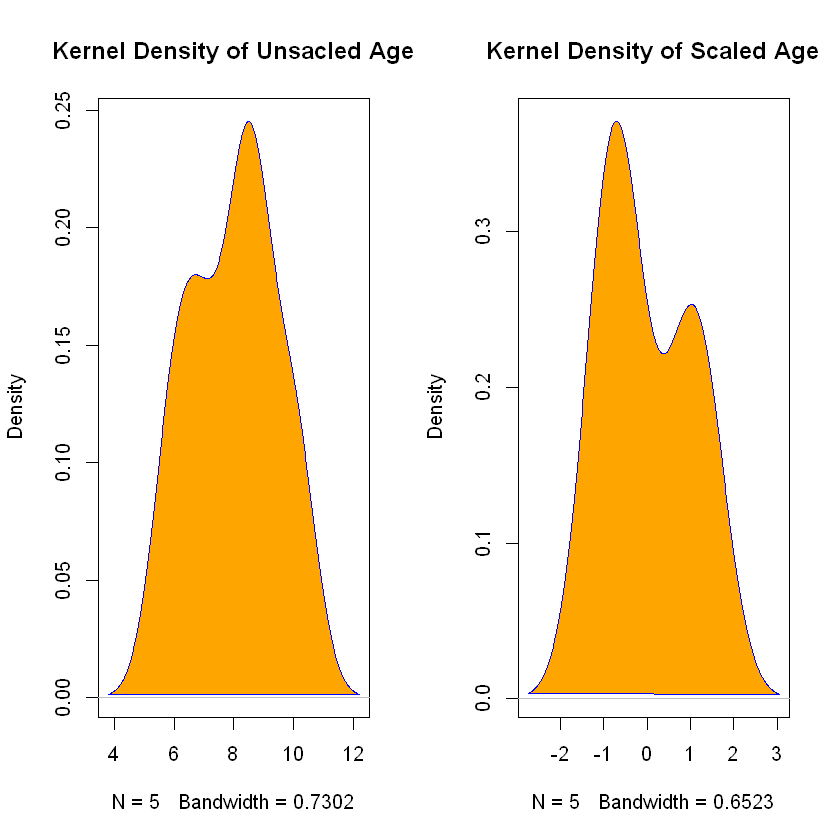

In [36]:
par(mfrow=c(1, 2))


# Kernel Density Plot
d1 <- density(data2$saturated_fat) 

# plots the results
plot(d1, main="Kernel Density of Unsacled staurated fat") 

# plots the results (filled)
polygon(d1, col="orange", border="blue")


# Kernel Density Plot
d2 <- density(data2$scaled_fat) 

# plots the results
plot(d2, main="Kernel Density of Scaleed saturated fat") 

# plots the results (filled)
polygon(d2, col="orange", border="blue")

In [ ]:
#my finding is that the graphs seem to be upised down and backwards when the density is lower